## <font face="微软雅黑"><center>《机器学习》</center></font>


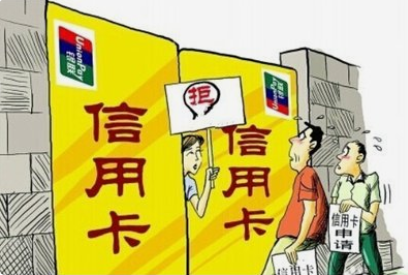

#  <font color=#0099ff  face="微软雅黑"><center>实验11 信用卡SVM分类实践</center></font>

## 实验要求：
<hr width="100%" style="margin-top:10px;border:0.5px solid black;"/>

### 【实验目的】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> 
通过SVM（支持向量机）来构建和训练一个使用 Universal Bank 记录的模型，并对客户是否有资格使用信用卡进行分类。掌握SVM算法的原理和使用场景、掌握导入数据、预处理数据、模型训练、模型评估、模型优化、可视化方法。
</div>

### 【实验环境】
<div style="margin-top:10px;text-indent:2em;dispaly=block"> Windows  Anconda   scikit-learn  Jupyter Notebook </div>
    
### 【实验内容】

本实验用Sklearn模块的SVM算法对信用卡申请做一个支持向量机模型。


### 【预备知识】

机器学习流程、特征工程技巧、分类模型评价、SVM算法


### 【实验背景】

通过机器学习对信用卡发放进行分类

# Types of SVM
***SVM have two types:***

**1. Linear SVM:** Linear SVM is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.

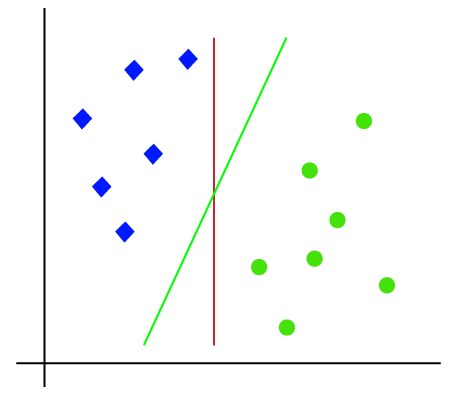

In [3]:
Image("Linear-SVM.png")

**2. Non-linear SVM:** Non-Linear SVM is used for non-linearly separated data, which means if a dataset cannot be classified by using a straight line, then such data is termed as non-linear data and classifier used is called as Non-linear SVM classifier.

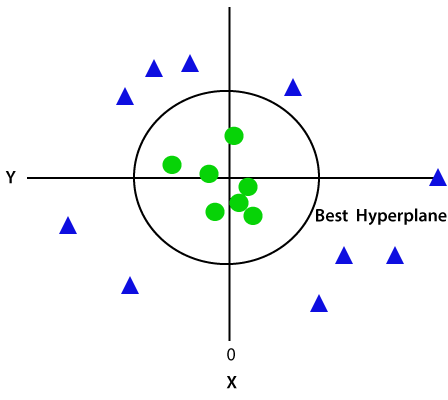

In [4]:
Image("Non-Linear-SVM.png")

# Optimal Hyperplane
Suppose we have a dataset that has two tags (green and blue), and the dataset has two features x1 and x2. We want a classifier that can classify the pair(x1, x2) of coordinates in either green or blue. The SVM algorithm helps to find the best line or decision boundary. SVM algorithm finds the closest point of the lines from both the classes. These points are called support vectors. The distance between the vectors and the hyperplane is called as **margin**. And the goal of SVM is to maximize this margin. The hyperplane with maximum margin is called the **optimal hyperplane**.

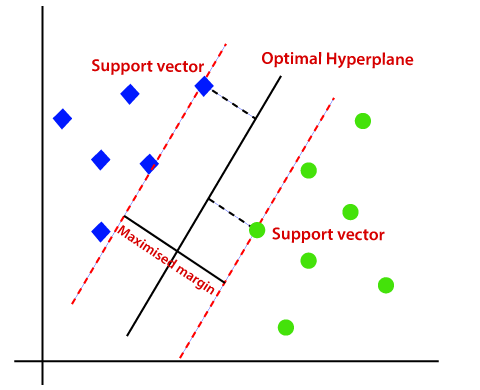

In [5]:
Image("Optimal-Hyperplane.png")

# Data Preprocessing

In [2]:
# 导入所需要的包
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squired_error,r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [5]:
# 读取 Universal Bank Data
data = pd.read_csv('UniversalBank.csv')
data.head(5)

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [41]:
# Checking for null values
data.isnull().sum()


ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [36]:
# Drop ID and ZIP Code columns from the dataset
data0 = data.drop(['ID','ZIP Code'],axis=1)
data0.head(5)

Age  Experience  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25           1      49       4    1.6          1         0              0   
1   45          19      34       3    1.5          1         0              0   
2   39          15      11       1    1.0          1         0              0   
3   35           9     100       1    2.7          2         0              0   
4   35           8      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

### Heatmap
**Plotting the Heatmap to see the correlations between features.**

In [37]:
cor = data0.corr()
cor

Age  Experience    Income    Family     CCAvg  \
Age                 1.000000    0.994215 -0.055269 -0.046418 -0.052012   
Experience          0.994215    1.000000 -0.046574 -0.052563 -0.050077   
Income             -0.055269   -0.046574  1.000000 -0.157501  0.645984   
Family             -0.046418   -0.052563 -0.157501  1.000000 -0.109275   
CCAvg              -0.052012   -0.050077  0.645984 -0.109275  1.000000   
Education           0.041334    0.013152 -0.187524  0.064929 -0.136124   
Mortgage           -0.012539   -0.010582  0.206806 -0.020445  0.109905   
Personal Loan      -0.007726   -0.007413  0.502462  0.061367  0.366889   
Securities Account -0.000436   -0.001232 -0.002616  0.019994  0.015086   
CD Account          0.008043    0.010353  0.169738  0.014110  0.136534   
Online              0.013702    0.013898  0.014206  0.010354 -0.003611   
CreditCard          0.007681    0.008967 -0.002385  0.011588 -0.006689   

                    Education  Mortgage  Personal Loan  Securities Account  \
Age                  0.041334 -0.012539      -0.007726           -0.000436   
Experience           0.013152 -0.010582      -0.007413           -0.001232   
Income              -0.187524  0.206806       0.502462           -0.002616   
Family               0.064929 -0.020445       0.061367            0.019994   
CCAvg               -0.136124  0.109905       0.366889            0.015086   
Education            1.000000 -0.033327       0.136722           -0.010812   
Mortgage            -0.033327  1.000000       0.142095           -0.005411   
Personal Loan        0.136722  0.142095       1.000000            0.021954   
Securities Account  -0.010812 -0.005411       0.021954            1.000000   
CD Account           0.013934  0.089311       0.316355            0.317034   
Online              -0.015004 -0.005995       0.006278            0.012627   
CreditCard          -0.011014 -0.007231       0.002802           -0.015028   

                    CD Account    Online  CreditCard  
Age                   0.008043  0.013702    0.007681  
Experience            0.010353  0.013898    0.008967  
Income                0.169738  0.014206   -0.002385  
Family                0.014110  0.010354    0.011588  
CCAvg                 0.136534 -0.003611   -0.006689  
Education             0.013934 -0.015004   -0.011014  
Mortgage              0.089311 -0.005995   -0.007231  
Personal Loan         0.316355  0.006278    0.002802  
Securities Account    0.317034  0.012627   -0.015028  
CD Account            1.000000  0.175880    0.278644  
Online                0.175880  1.000000    0.004210  
CreditCard            0.278644  0.004210    1.000000

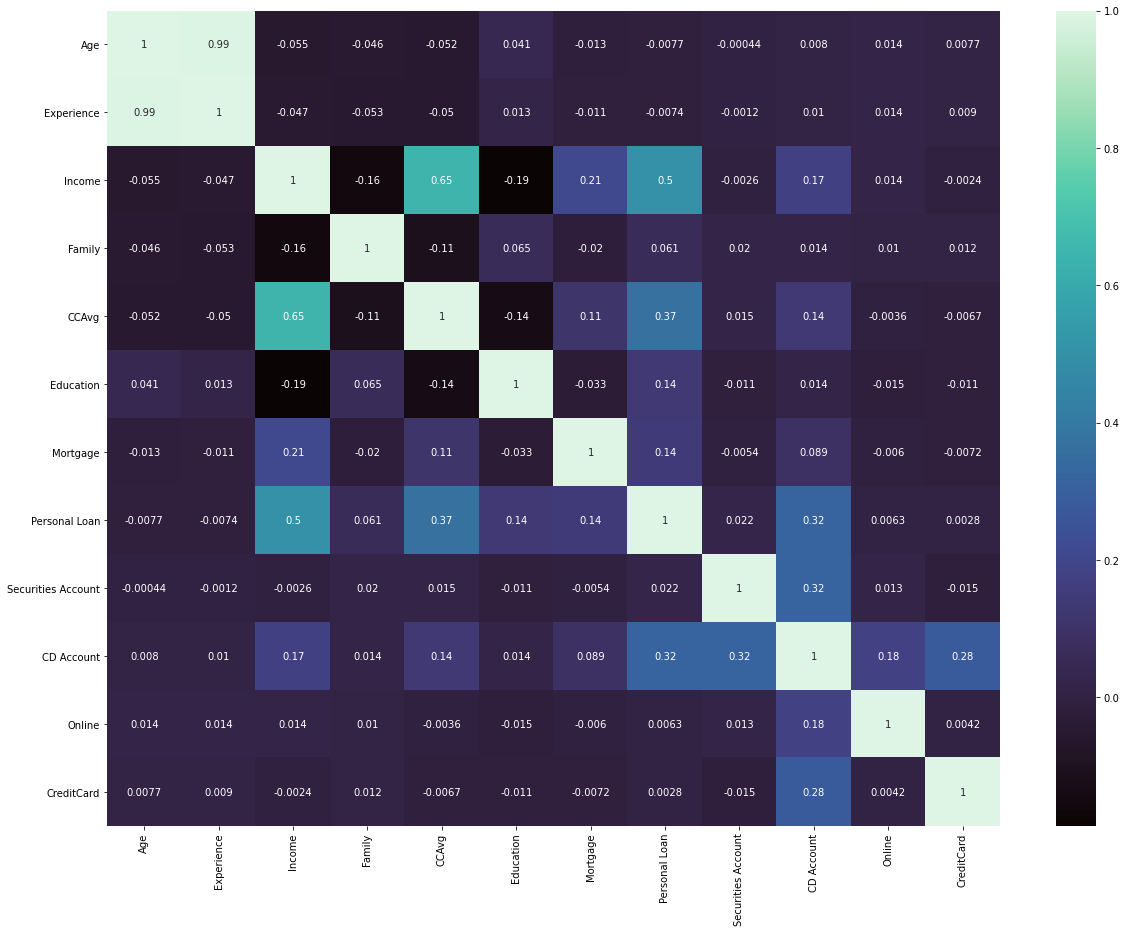

In [38]:
#画热力图，看相关性
import seaborn as sns

plt.figure(figsize=(20,15))
sns.heatmap(cor,annot=True,cmap='mako')
plt.show()


In [40]:
# Drop "Experience" column from the dataset
data1 = data0.drop('Experience',axis=1)
data1.head(5)

Age  Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0   25      49       4    1.6          1         0              0   
1   45      34       3    1.5          1         0              0   
2   39      11       1    1.0          1         0              0   
3   35     100       1    2.7          2         0              0   
4   35      45       4    1.0          2         0              0   

   Securities Account  CD Account  Online  CreditCard  
0                   1           0       0           0  
1                   1           0       0           0  
2                   0           0       0           0  
3                   0           0       0           0  
4                   0           0       0           1

# Implimentation of SVM
**Now we will implement the SVM algorithm using Python. Here we will use the Universal Bank Dataset to understand the Support Vector Machine Algorithm.**

In [43]:
# 将数据集划分为测试集和训练集

x = data1[['Age','Income','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account','Online']]
y = data1['CreditCard']

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.8,random_state = 1)

### Scaling the data
Here we can see our data is not in the same range. So, We need to scale our data in same range for that we will use Standard Scaler technique.

StandardScaler follows Standard Normal Distribution (SND). Therefore, it makes mean = 0 and scales the data to unit variance. 

In [45]:
# 从sklearn.preprocessing导入数据标准化模块。
from sklearn.preprocessing import StandardScaler

# 对Xx_train 和 x_test进行标准化
transfer = StandardScaler()
x_train = transfer.fit_transform(x_train)
x_test = transfer.transform(x_test)

# SVM Kernel Functions
A kernel is a function used in SVM for helping to solve problems. With the help of kernel we can go to higher dimensions and perform smooth calculations. We can go up to an infinite number of dimensions using kernels.
Kernel plays a vital role in classification and is used to analyze some patterns in the given dataset. They are very helpful in solving a non-linear problem by using a linear classifier.

Sometimes, we cannot have a hyperplane for certain problems. This problem arises when we go up to higher dimensions and try to form a hyperplane. We have various svm kernel functions to convert the non-linear data to linear. In this notebook, we listed 8 such popular svm kernel functions.

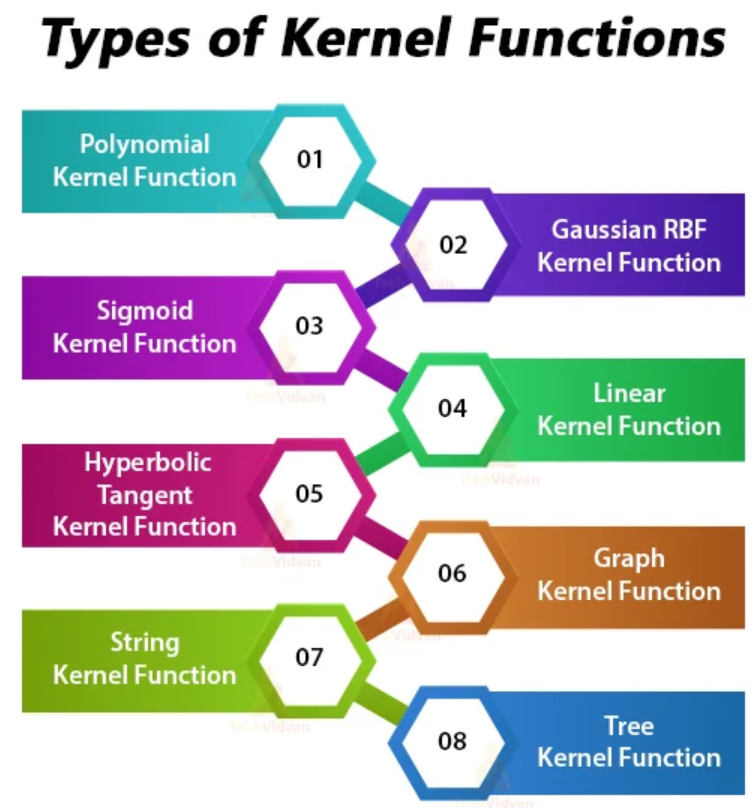

In [9]:
Image("types-of-kernel-functions.png")

### Now we wiil see how to implement these kernel functions.
# Linear Kernel
It is the most basic type of kernel, usually one dimensional in nature. It proves to be the best function when there are lots of features.

Linear kernel functions are faster than other functions. 
### Linear Kernel Formula
**F(x, xj) = sum( x.xj)**

Here, x, xj represents the data we’re trying to classify.

Now we will make our svc classifier using a linear kernel.

In [48]:
# Apply SVM model using Linear Kernel function 
from sklearn as svm

linear_classifier = SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kerne ：{0:0.3f}'.format(accuracy_score(y_test,y_pred)))






SyntaxError: invalid syntax (<ipython-input-48-0f9c30162389>, line 2)

<AxesSubplot:>

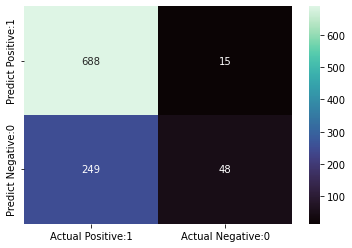

In [12]:
# Confusion Matrix  








In [13]:
# Classification Report






              precision    recall  f1-score   support

           0       0.73      0.98      0.84       703
           1       0.76      0.16      0.27       297

    accuracy                           0.74      1000
   macro avg       0.75      0.57      0.55      1000
weighted avg       0.74      0.74      0.67      1000



# Gaussian RBF kernel
It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

### Gaussian Radial Basis Formula
**F(x, xj) = exp(-gamma * ||x - xj||^2)**

The value of gamma varies from 0 to 1. We have to manually provide the value of gamma in the code. The most preferred value for gamma is 0.1.

In [14]:
# Apply SVM model using Gaussian RBF kernel function 







Model accuracy with rbf kernel : 0.739


In [15]:
# 求截距




array([-0.39696623])

In [17]:
# 求支持向量



array([[-0.63075851,  1.23132319,  1.39653142, ..., -0.34160589,
        -0.25208516, -1.23565681],
       [-0.19364243, -0.22817772,  0.52410823, ...,  2.92734999,
        -0.25208516, -1.23565681],
       [ 0.50574331,  0.03322543, -1.22073815, ..., -0.34160589,
        -0.25208516, -1.23565681],
       ...,
       [-0.19364243, -0.53314806,  0.52410823, ..., -0.34160589,
        -0.25208516,  0.8092862 ],
       [-1.15529782, -1.12130514,  1.39653142, ..., -0.34160589,
        -0.25208516,  0.8092862 ],
       [ 0.68058975, -0.18461053, -1.22073815, ..., -0.34160589,
        -0.25208516,  0.8092862 ]])

<AxesSubplot:>

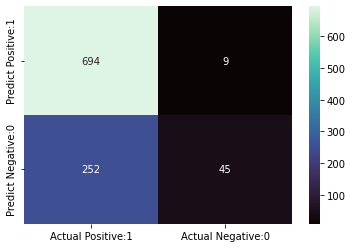

In [18]:
# Confusion Matrix









In [19]:
# Classification Report






              precision    recall  f1-score   support

           0       0.73      0.99      0.84       703
           1       0.83      0.15      0.26       297

    accuracy                           0.74      1000
   macro avg       0.78      0.57      0.55      1000
weighted avg       0.76      0.74      0.67      1000



# Polynomial Kernel
It is a more generalized representation of the linear kernel. It is not as preferred as other kernel functions as it is less efficient and accurate.

### Polynomial Kernel Formula
**F(x, xj) = (x.xj+1)^d**

Here ‘.’ shows the dot product of both the values, and d denotes the degree. 

F(x, xj) representing the decision boundary to separate the given classes. 

In [20]:
# Apply SVM model using Polynomial Kernel function








Model accuracy with rbf kernel : 0.739


<AxesSubplot:>

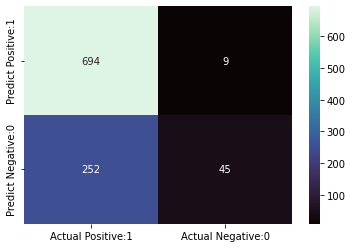

In [21]:
# Confusion Matrix








In [22]:
# Classification Report






              precision    recall  f1-score   support

           0       0.73      0.99      0.84       703
           1       0.83      0.15      0.26       297

    accuracy                           0.74      1000
   macro avg       0.78      0.57      0.55      1000
weighted avg       0.76      0.74      0.67      1000



# Sigmoid Kernel
It is mostly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.

### Sigmoid Kenel Formula
**F(x, xj) = tanh(αxay + c)**

In [23]:
# Apply SVM model using Sigmoid Kernel function







Model accuracy with rbf kernel : 0.635


<AxesSubplot:>

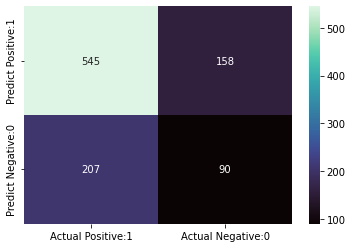

In [24]:
# Confusion Matrix








In [25]:
# Classification Report





              precision    recall  f1-score   support

           0       0.72      0.78      0.75       703
           1       0.36      0.30      0.33       297

    accuracy                           0.64      1000
   macro avg       0.54      0.54      0.54      1000
weighted avg       0.62      0.64      0.62      1000



# 通过本次实验回答以下问题

（1）数据中哪两个特征的相关性最强？

（2）对于本项目，线性支持向量机 VS 非线性支持向量机，哪个更适合我们的数据？

（3）对于非线性支持向量机，哪个核函数表现的最好？